# **Basic Data Science Projects using Python, NumPy, Pandas, Matplotlib, Regular Expressions, and SQL**

<center>

*By: Prof. James Abello, Haoyang Zhang*

*Computer Science Department*

*Rutgers University*

*Nov. 21, 2024.*

</center>

## Topic 1: Game of Life (NumPy, matplotlib)

#### **Objective:** Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

#### **Estimated Completion Time: 6 hours**


This game is an example of a Cellular Automaton. Each cell corresponds to a point in 2D.

A good video reference is 
> Stephen Hawkings The Meaning of Life (John Conway's Game of Life segment) by 0524432
> 
> https://www.youtube.com/watch?v=CgOcEZinQ2I

Consider a grid of 2D cells each represented by a 2D unit square. Each cell has two states: dead (encoded as 0) or alive (encoded as 1). Each cell in the grid is updated in discrete time steps depending on the **state of its eight neighbors**. 

Initially, some cells are selected randomly to be alive and the rest are dead. The grid is updated in **each time step** according to the following **basic** rules:
- if a dead cell has 3 neighbors alive, then it the comes back to life
- if an alive cell has 2 or 3 neighbors alive, then the cell continues to be alive.
- if an alive cell has less than 2 or more than 3 neighbors alive, then the cell dies.

**The goal** of the game is to find patterns that evolve in interesting ways – something that people have now been doing for over 50 years.
> https://playgameoflife.com/

For example:
- gliders: 
    > https://playgameoflife.com/lexicon/glider
- spaceships:
    > https://playgameoflife.com/lexicon#iz5
- splitter
    > https://playgameoflife.com/lexicon/splitter
- Herschel receiver
    > https://playgameoflife.com/lexicon/herschel-receiver
- G4 receiver
    > https://playgameoflife.com/lexicon/G4_receiver

**What to submit:**
- Your code that simulates the game of life with the **basic rules**.
- A 30-second video of a pattern that was generated by your code and you find surprising or interesting.

An approach to be successful is to design on local patterns that could generate other patterns according to the specified rules. Another approach is to try to understand the effect of different rules.

### Tasks

#### Level 1 (fixed set of rules, 15 pts) 
From a randomly selected initial subset of life cells, and a fixed set of rules, find interesting patterns

```mermaid
graph TB
    Init["Generate an initial random subset of life cells (2D points)"]
    Draw_init["Display the 2D positions of the selected collection of cells (2D points)"]
    Update["For each cell evaluate the update rules specified above to obtain its new state"]
    Draw["Display the 2D positions of the current life cells (2D points)"]
    More{"Ask the user if he/she wants to update once more?"}

    START([Start])
    END([End])

    START --> Init
    Init --> Draw_init
    Draw_init --> Update
    Update --> Draw
    Draw --> More
    More -- Yes --> Update
    More -- No --> END  
```

##### Task 1.1
After playing the game at https://playgameoflife.com/
- Implement a Python function `init_life_state_1()` by using NumPy to generate an initial random subset of life cells (a subset of coordinates whose representing points are considered alive).
- Implement a Python function `draw_life_state_1()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in light gray.
    ```python
    def draw_cell_background(x, y):
        plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')
    ```


In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

# testing for a GUI interface
import tkinter as tk
from tkinter import simpledialog
import matplotlib.animation as animation

In [2]:
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """

    # generate random numbers
    rand = np.random.rand(n, m)

    # create a boolean array
    state = rand < p
    return state

##### Task 1.2

Implement a Python function `update_life_state_1()` that takes a 2D NumPy array representing the current state of the grid and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

Note: Make sure that all the cells are updated simultaneously. That is, the new state of each cell should be computed based on the original state of all the cells.

In [11]:
def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    
    # get the shape of the array
    n, m = life_state.shape

    # create a new array if necessary
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=bool)

    # iterate over all cells
    for i in range(n):
        for j in range(m):

            # get the number of alive neighbors
            row_start = max(i - 1, 0)
            row_end = min(i + 2, n)
            col_start = max(j - 1, 0)
            col_end = min(j + 2, m)

            neighborhood_sum = np.sum(life_state[row_start:row_end, col_start:col_end])
            alive_neighbors = neighborhood_sum - life_state[i, j]

            # apply the rules
            if life_state[i, j] == 1: # if the cell is alive
                if alive_neighbors != 2 and alive_neighbors != 3: # if the cell has less than 2 or more than 3 neighbors (exclusive)
                    out_life_state[i, j] = 0 # kill the cell
                else:
                    out_life_state[i, j] = 1 # keep the cell alive
            else: # if the cell is dead
                if alive_neighbors == 3: # if the cell has exactly 3 neighbors 
                    out_life_state[i, j] = 1 # revive the cell
                else:
                    out_life_state[i, j] = 0 # keep the cell dead

    return out_life_state


##### Task 1.3

Use `draw_life_state_1()` to display the current state of the grid.

In [30]:
def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """

    # display the state
    plt.imshow(life_state, cmap='binary')
    plt.show()
    

##### Task 1.4

Implement a Python function `play_game_of_life_1()` that uses the functions implemented above to play the game of life. The function should ask the user the desired number of iterations to update the grid and display the grid at each iteration. When reaching the desired number of iterations, the function should ask the user if he/she wants to update more times. If the user does not want to continue updating, the function should ask the user if he/she wants to save the initial collection of life cells and the final configuration (caveat: this may not be always feasible) as a csv file.

In [12]:
import csv

def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    print("Enter the number of rows and columns:")
    n = int(input())
    m = int(input())

    # ask the user for the probability of a cell being alive
    print("Enter the probability of a cell being alive:")
    p = float(input())

    # ask the user for the number of iterations
    print("Enter the number of iterations:")
    iterations = int(input())

    # print the initial state
    life_state = init_life_state_1(n, m, p)
    original_life_state = life_state.copy()
    draw_life_state_1(life_state)

    user_input = "yes"

    # update the grid and display it at each iteration
    while True:
        if user_input == "yes":
            for i in range(iterations):
                life_state = update_life_state_1(life_state)
                draw_life_state_1(life_state)
        elif user_input == "no":
            save_input = input("Do you want to save the initial collection of life cells and the final configuration as a csv file? (yes/no)")
            if save_input == "yes":
                with open('life_state.csv', mode='w') as file:
                    writer = csv.writer(file)
                    writer.writerows(original_life_state)
                    writer.writerows(life_state)
                break
            else:
                print("The game of life has ended.")
                break
        else:
            print("Invalid input. Please enter yes or no.")
        user_input = input("Do you want to continue? (yes/no)")

Enter the number of rows and columns:
Enter the probability of a cell being alive:
Enter the number of iterations:


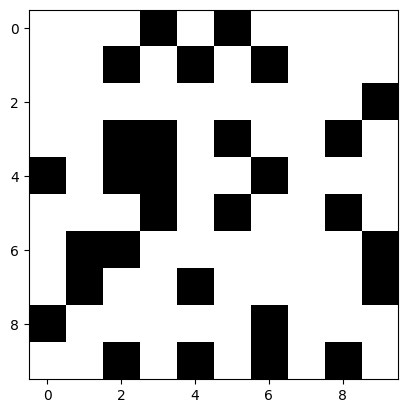

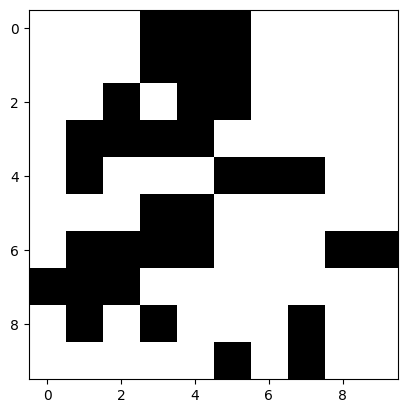

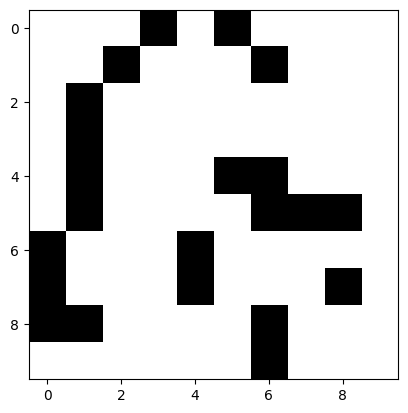

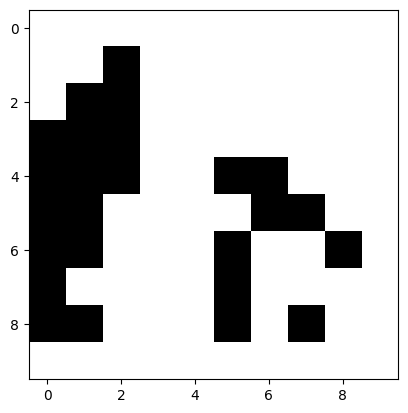

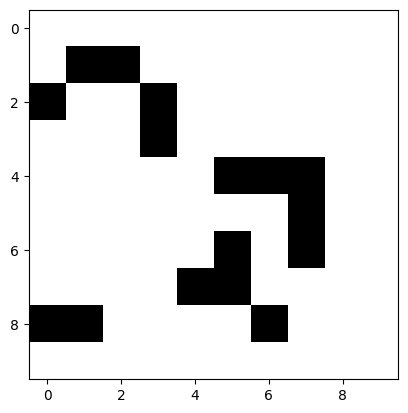

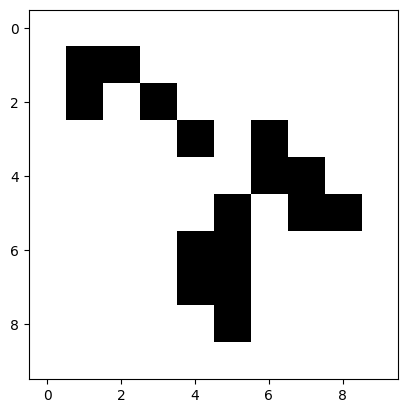

The game of life has ended.


In [13]:
if __name__ == "__main__":
    np.random.seed(211)
    play_game_of_life_1()

#### Level 2 (user-specified rules, 15 pts)

From a randomly selected initial subset of life cells, and a user-specified set of rules, find interesting patterns.

A user can specify a rule by inputting four integers: $b_1$, $b_2$, $d_1$, and $d_2$ between $0$ and $8$, and $d_1 \leq b_1 \leq b_2 \le d_2$. The rules are as follows:

- if a dead cell has at least $b_1$ and at most $b_2$ neighbors alive, then it the comes back to life
- if an alive cell has at least $d_1$ and at most $d_2$ neighbors alive, then it continues to be alive.
- if an alive cell has less than $d_1$ or more than $d_2$ neighbors alive, then the cell dies.

Notice that if $b_1 = 3$, $b_2 = 3$, $d_1 = 2$, and $d_2 = 3$, then the rules are the **basic rules**.

##### Task 2.1

The same as Task 1.1.

In [14]:
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return init_life_state_1(n, m, p)


##### Task 2.2

Implement a Python function `update_life_state_2()` that takes the same in input as `update_life_state_1()` plus the four integers that defaults to `b1=3, b2=3, d1=2, d2=3` and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

```python
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    pass
```

Or you can create a constructor for `update_life_state_2()` as follows:

```python
def generate_update_life_state_2(b1=3, b2=3, d1=2, d2=3):
    """
    Generate a function that updates the life state according to the specified rules
    IN: b1, int, lower bound of the number of neighbors
        b2, int, upper bound of the number of neighbors
        d1, int, lower bound of the number of neighbors
        d2, int, upper bound of the number of neighbors
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using b1, b2, d1, and d2
    def update_life_state_2(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using b1, b2, d1, and d2
        pass

    # return the defined function
    return update_life_state_2
```

##### Task 2.3

In [15]:
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=bool)

    for i in range(n):
        for j in range(m):
            row_start = max(i - 1, 0)
            row_end = min(i + 2, n)
            col_start = max(j - 1, 0)
            col_end = min(j + 2, m)
            neighborhood_sum = np.sum(life_state[row_start:row_end, col_start:col_end])
            alive_neighbors = neighborhood_sum - life_state[i, j]

            if life_state[i, j] == 1: # if the cell is alive
                if alive_neighbors < d1 or alive_neighbors > d2: # if the cell has less than d1 or more than d2 neighbors (exclusive)
                    out_life_state[i, j] = 0 # kill the cell
                else:
                    out_life_state[i, j] = 1 # keep the cell alive
            else: # if the cell is dead
                if alive_neighbors >= b1 and alive_neighbors <= b2: # if the cell has between b1 and b2 neighbors (inclusive)
                    out_life_state[i, j] = 1 # revive the cell
                else:
                    out_life_state[i, j] = 0 # keep the cell dead
    
    return out_life_state
    
    

The same as Task 1.3.

##### Task 2.4

Implement a Python function `play_game_of_life_2()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules, and when saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary. For the **basic rules**, the JSON format should be as follows:
```json
{
    "b1": 3,
    "b2": 3,
    "d1": 2,
    "d2": 3
}
```

```python
def play_game_of_life_2():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    pass
    # ask the user for the rules
    pass
    # update the grid and display it at each iteration
    pass
    # ask the user if he/she wants to update more times
    pass
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    pass
```

In [16]:
import csv
import json

def play_game_of_life_2():
    """
    Play the game of life (using the second set of rules from user input)
    IN: None
    OUT: None
    """

    # ask the user for initial state
    print("Enter the number of rows and columns:")
    n = int(input())
    m = int(input())

    # ask the user for the probability of a cell being alive
    print("Enter the probability of a cell being alive:")
    p = float(input())

    # ask the user for the number of iterations
    print("Enter the number of iterations:")
    iterations = int(input())

    # ask user for the values of b1, b2, d1, and d2
    print("Enter the values of b1, b2, d1, and d2:")
    b1 = int(input())
    b2 = int(input())
    d1 = int(input())
    d2 = int(input())

    # print the initial state
    life_state = init_life_state_2(n, m, p)
    original_life_state = life_state.copy()
    draw_life_state_1(life_state)

    # Begin the game
    user_input = "yes"
    while True:
        if user_input == "yes":
            for i in range(iterations):
                life_state = update_life_state_2(life_state, b1, b2, d1, d2)
                draw_life_state_1(life_state)
        elif user_input == "no":
            save_input = input("Do you want to save the initial collection of life cells and the final configuration as a csv file? (yes/no)")
            if save_input == "yes":
                with open('life_state.csv', mode='w') as file: # csv for initial/final life state
                    writer = csv.writer(file)
                    writer.writerows(original_life_state)
                    writer.writerows(life_state)
                with open('life_state.json', mode='w') as file: # json for rules
                    json.dump({"b1": b1, "b2": b2, "d1": d1, "d2": d2}, file)
                break
            else:
                print("The game of life has ended.")
                break
        else:
            print("Invalid input. Please enter yes or no.")
        user_input = input("Do you want to continue? (yes/no)")

Enter the number of rows and columns:
Enter the probability of a cell being alive:
Enter the number of iterations:
Enter the values of b1, b2, d1, and d2:


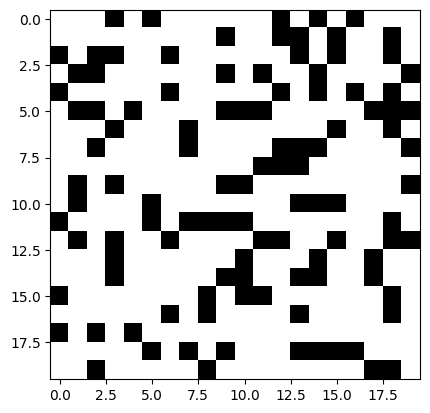

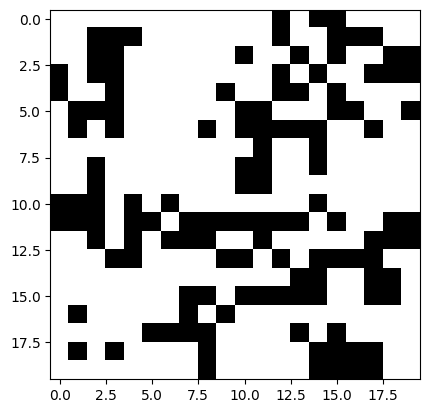

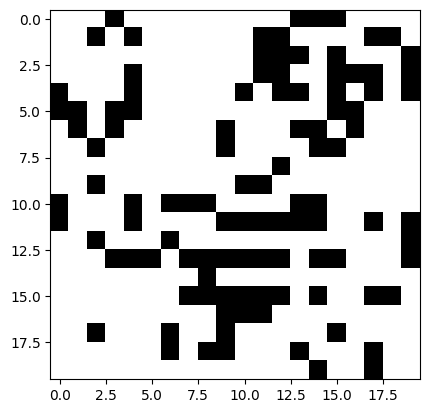

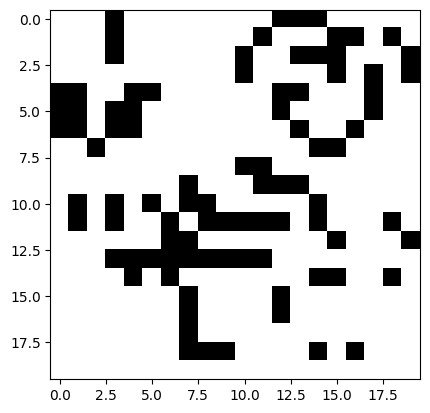

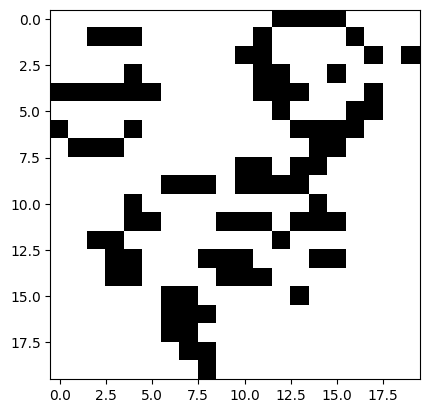

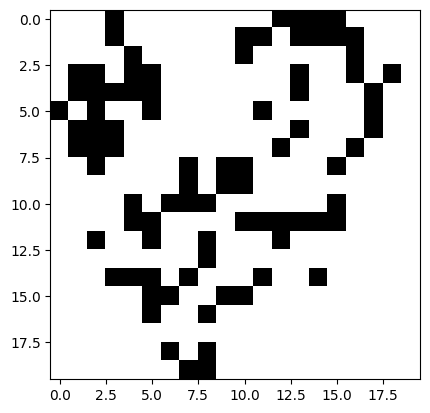

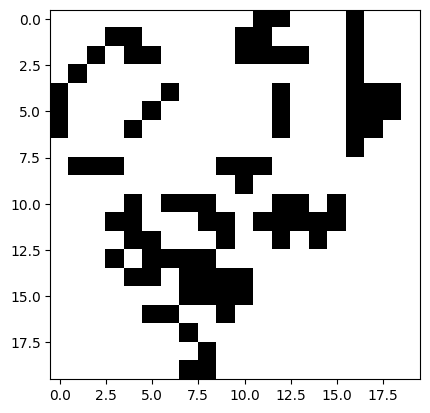

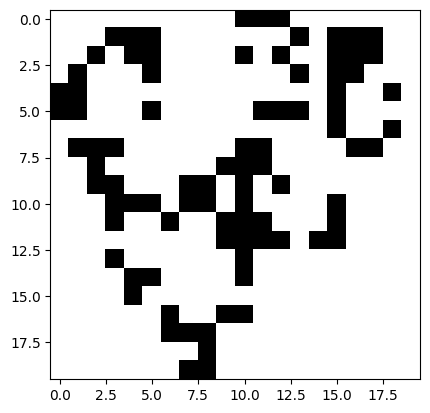

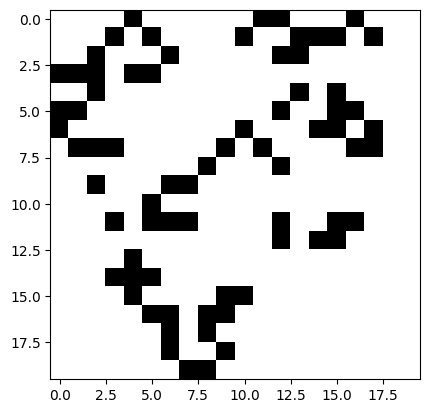

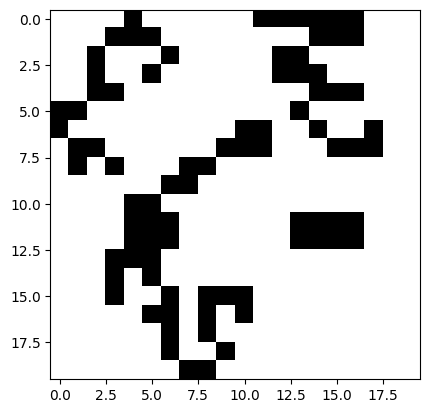

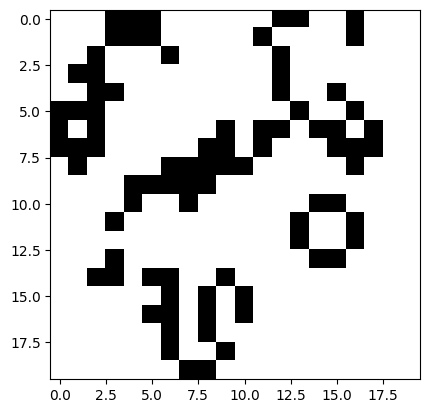

The game of life has ended.


In [17]:
if __name__ == "__main__":
    np.random.seed(211)
    play_game_of_life_2()

#### Level 3 (non-binary states, 30 pts)

In this level, the states of the cells are not binary. Instead, the states are integers between $0$ and $255$, each representing a user specified state. For example, each cell may have three possibilities:
- $0$ to represent a removed cell
- $1$ to represent a live and susceptible cell
- $2$ to represent a cell infected by a virus

A set of rules could be:

A subset of cells is selected randomly to be infected (2), and the rest are susceptible (1). The grid is updated in each time step as follows:

- Infected (2) cells get a chance to pass the infection along to each of their Susceptible (1) neighbors, with a probability equal to the transmission rate.
- Infected (2) cells have a chance to transition to the removed (0) state, indicating that they are no longer capable of infecting others or being infected again. The probability of this transition is equal to the recovery rate.

```mermaid
stateDiagram-v2

S: Susceptible
I: Infected
R: Removed

S --> I: neighbor of an infected cell, and the infected cell infects the susceptible cell
S --> S: no infected neighbor, or the infected cell does not infect the susceptible cell
I --> R: recovers
R --> R
```

##### Task 3.1

After playing the game at https://meltingasphalt.com/interactive/going-critical/ and https://ncase.me/simulating/model/

- Implement a Python function `init_life_state_3()` by using NumPy to generate an initial random subset of non-binary cells.
- Implement a Python function `draw_life_state_3()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in their respective colors with transparency.
```python
def draw_cell_background(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)
```

```python
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    pass
```

```python
def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    pass
```

In [25]:
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    # generate random grid given states and probabilities
    state = np.zeros((n, m), dtype=int) # initialize state array
    for i in range(n):
        for j in range(m):
            state[i, j] = np.random.choice(states, p=p_list)
    return state

        


In [27]:
if __name__ == "__main__":
    # testing the function
    np.random.seed(211)
    n = 10
    m = 10
    p_list = [0.1, 0.3, 0.6]
    states_list = [0, 1, 2] 

    life_state = init_life_state_3(n, m, p_list, states_list)
    print(life_state)

[[2 2 2 0 2 1 2 2 2 2]
 [2 1 1 2 1 2 1 2 2 1]
 [2 1 2 2 2 2 2 1 2 1]
 [2 2 1 1 2 1 2 2 1 2]
 [1 1 1 1 2 2 1 2 2 2]
 [2 2 2 1 2 1 2 2 0 2]
 [2 1 1 2 2 1 2 2 1 0]
 [2 0 2 2 1 2 2 2 2 0]
 [1 2 2 1 2 2 1 2 2 2]
 [2 1 0 2 1 2 0 2 0 2]]


##### Task 3.2

Implement a Python function `update_life_state_3()` that takes a 2D NumPy array representing the current state of the grid, and a dictionary specifying the rules, and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

For the Susceptible-Infected-Removed rules, the dictionary should be as follows:
```python
rules = {
    0: [  # removed cells
        {
            "turn_to": 0  # always stay removed
        }
    ],
    1: [  # susceptible cells
        {
            "neighbor_to": {
                "if": [  # adjacent to at least 1 infected cell (type 2)
                    {
                        "at_least": 1,
                        "at_most": 9,  # always true
                        "type": 2
                    }
                ],
                "then": {
                    "probability": [  # 25% chance of getting infected and 75% chance of staying susceptible
                        {
                            "value": 0.25,  # transmission rate 25%
                            "then": {
                                "turn_to": 2
                            },
                        },
                        {
                            "value": 0.75,  # leftover 75%
                            "then": {
                                "turn_to": 1
                            }
                        }
                    ]
                }
            }
        }
    ],
    2: [
        {  # infected cells
            "probability": [  # 50% chance of recovering and 50% chance of staying infected
                {
                    "value": 0.5,  # recovery rate 50%
                    "then": {
                        "turn_to": 0
                    }
                },
                {
                    "value": 0.5,  # leftover 50%
                    "then": {
                        "turn_to": 2
                    }
                }
            ]
        }
    ]
}
```

```python
def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    pass
```

Or you can create a constructor for `update_life_state_3()` as follows:

```python
def generate_update_life_state_3(rules_dict):
    """
    Generate a function that updates the life state according to the specified rules
    IN: rules_dict, dict, rules for updating the cells
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using rules_dict
    def update_life_state_3(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using rules_dict
        pass

    # return the defined function
    return update_life_state_3
```

In [72]:
import numpy as np
import random

def update_life_state_3(life_state, rules_dict, out_life_state = None):
    """
    For each cell, evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, dictionary of rules
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    # get the shape of the array
    n, m = life_state.shape

    # create a new array if necessary
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)

    # iterate over all cells
    for i in range(n):
        for j in range(m):
            current_state = int(life_state[i, j]) # get the current state of the cell
            rules = rules_dict[str(current_state)] # get the rules for current state
            for rule in rules:
                if "neighbor_to" in rule: # we have a neighbor rule for the current cell
                    neighbor_rule = rule["neighbor_to"] # get the neighbor rule

                    if_cond = neighbor_rule["if"][0] # break down the if condition
                    neighbor_type = if_cond["type"] # which type triggers the if-condition of this rule
                    at_least = if_cond["at_least"] # how many neighbors of this type are needed
                    at_most = if_cond["at_most"] # how many neighbors of this type are needed at most

                    # count number of neighbors of specified type surrounding the cell
                    count = 0
                    for x in range(max(0,i-1), min(n, i+2)):
                        for y in range(max(0,j-1), min(m, j+2)):
                            if life_state[x, y] == neighbor_type and (x != i or y != j): # if the cell is of the specified type and not the current cell
                                count += 1

                    if at_least <= count <= at_most: # if the number of neighbors of the specified type is within the specified range
                        probabilities = neighbor_rule["then"]["probability"]
                        rand_val = random.random()
                        cumulative_prob = 0
                        for prob in probabilities:
                            cumulative_prob += prob["value"]
                            if rand_val <= cumulative_prob:
                                out_life_state[i, j] = prob["then"]["turn_to"]
                                break
                        break
                elif "probability" in rule: # we have a probability rule for the current cell (no neighbor rule)
                    probabilities = rule["probability"]
                    rand_val = random.random()
                    cumulative_prob = 0
                    for prob in probabilities:
                        cumulative_prob += prob["value"]
                        if rand_val <= cumulative_prob:
                            out_life_state[i, j] = prob["then"]["turn_to"]
                            break
                    break

    return out_life_state

##### Task 3.3

Similar to Task 1.3, except that the function to be called is `draw_life_state_3()`.

In [73]:
def draw_life_state_3(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    # display the state
    plt.imshow(life_state, cmap='viridis')

    # add a legend with discrete values
    plt.colorbar(ticks=np.unique(life_state))
    plt.show()

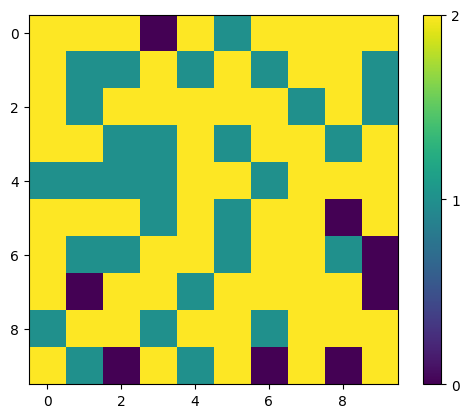

KeyError: '2'

In [74]:
if __name__ == "__main__":
    # generate initial state
    np.random.seed(211)
    n = 10
    m = 10
    p_list = [0.1, 0.3, 0.6]
    states_list = [0, 1, 2]

    rules = {
    0: [  # removed cells
        {
            "turn_to": 0  # always stay removed
        }
    ],
    1: [  # susceptible cells
        {
            "neighbor_to": {
                "if": [  # adjacent to at least 1 infected cell (type 2)
                    {
                        "at_least": 1,
                        "at_most": 9,  # always true
                        "type": 2
                    }
                ],
                "then": {
                    "probability": [  # 25% chance of getting infected and 75% chance of staying susceptible
                        {
                            "value": 0.25,  # transmission rate 25%
                            "then": {
                                "turn_to": 2
                            },
                        },
                        {
                            "value": 0.75,  # leftover 75%
                            "then": {
                                "turn_to": 1
                            }
                        }
                    ]
                }
            }
        }
    ],
    2: [
        {  # infected cells
            "probability": [  # 50% chance of recovering and 50% chance of staying infected
                {
                    "value": 0.5,  # recovery rate 50%
                    "then": {
                        "turn_to": 0
                    }
                },
                {
                    "value": 0.5,  # leftover 50%
                    "then": {
                        "turn_to": 2
                    }
                }
            ]
        }
    ]
}

    life_state = init_life_state_3(n, m, p_list, states_list)
    original_life_state = life_state.copy()

    draw_life_state_3(life_state)

    # update the grid
    life_state = update_life_state_3(life_state, rules)
    draw_life_state_3(life_state)

##### Task 3.4

Implement a Python function `play_game_of_life_3()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules as a JSON file in the format of a dictionary. When saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary.

```python
def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    pass
    # ask the user for the rules
    pass
    # update the grid and display it at each iteration
    pass
    # ask the user if he/she wants to update more times
    pass
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    pass
```

In [75]:
def play_game_of_life_3():
    """
    Play the game of life (using the third set of rules from user input)
    IN: None
    OUT: None
    """

    # ask the user for initial state
    print("Enter the number of rows and columns:")
    n = int(input())
    m = int(input())

    # ask the user to input a json file with the rules
    rules_file = input("Enter the name of the json file containing the rules:")
    with open(rules_file) as file:
        rules = json.load(file)

    # ask the user for the number of iterations
    print("Enter the number of iterations:")
    iterations = int(input())

    # print the initial state
    p_list = [0.1, 0.3, 0.6]
    states_list = [0, 1, 2]

    life_state = init_life_state_3(n, m, p_list, states_list)
    original_life_state = life_state.copy()
    draw_life_state_3(life_state)

    # Begin the game
    user_input = "yes"
    while True:
        if user_input == "yes":
            for i in range(iterations):
                life_state = update_life_state_3(life_state, rules)
                draw_life_state_3(life_state)
        elif user_input == "no":
            save_input = input("Do you want to save the initial collection of life cells and the final configuration as a csv file? (yes/no)")
            if save_input == "yes":
                with open('life_state.csv', mode='w') as file: # csv for initial/final life state
                    writer = csv.writer(file)
                    writer.writerows(original_life_state)
                    writer.writerows(life_state)
                with open('life_state.json', mode='w') as file: # json for rules
                    json.dump(rules, file)
                break
            else:
                print("The game of life has ended.")
                break
        else:
            print("Invalid input. Please enter yes or no.")
        user_input = input("Do you want to continue? (yes/no)")


Enter the number of rows and columns:
Enter the number of iterations:


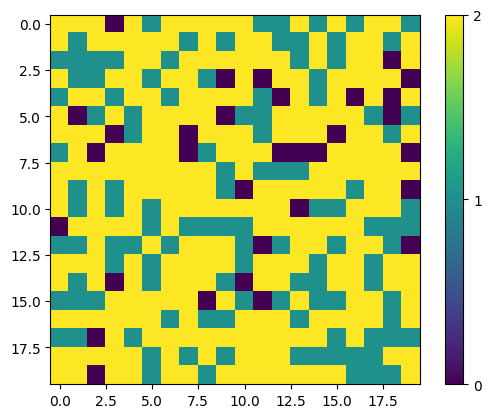

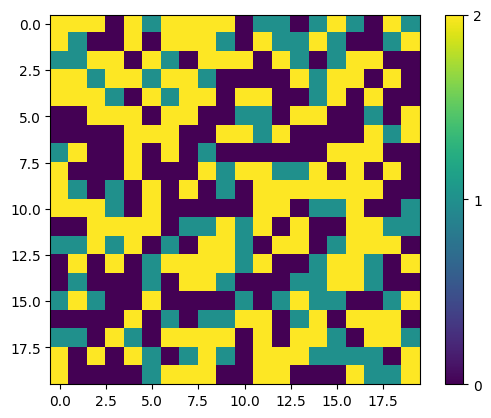

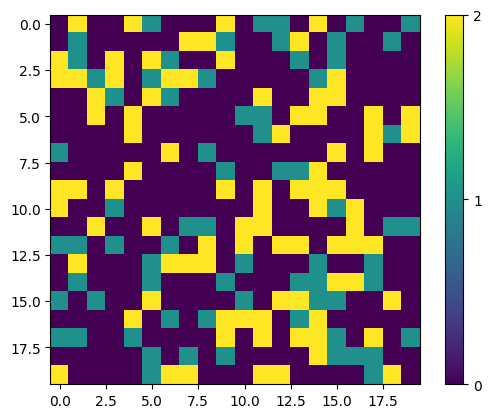

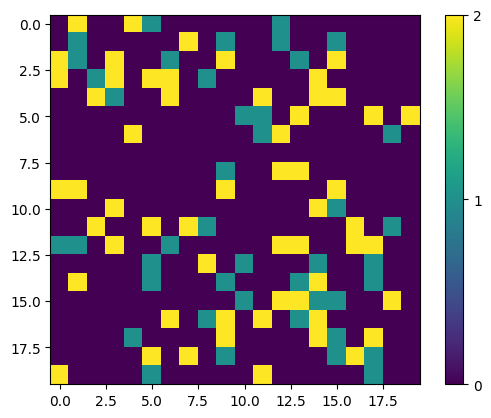

The game of life has ended.


In [76]:
if __name__ == "__main__":
    np.random.seed(211)
    play_game_of_life_3()

#### References

> - Gardner, Martin (October 1970). "The fantastic combinations of John Conway's new solitaire game 'life'" (PDF). Mathematical Games. Scientific American. Vol. 223, no. 4. pp. 120–123. doi:10.1038/scientificamerican1070-120. JSTOR 24927642.
> - Berlekamp, E. R.; Conway, John Horton; Guy, R. K. (2001–2004). Winning Ways for your Mathematical Plays (2nd ed.). A K Peters Ltd.
> - Izhikevich, Eugene M.; Conway, John H.; Seth, Anil (2015-06-21). "Game of Life". Scholarpedia. 10 (6): 1816. Bibcode:2015SchpJ..10.1816I. doi:10.4249/scholarpedia.1816. ISSN 1941-6016.
> - "NaiveLife Emulated: A reading-order simulation of Life". ConwayLife.com. 24 May 2020.
> - Goucher, Adam. "Re: Thread For Your Accidental Discoveries". ConwayLife.com.
> - Ian07. "Re: Strange spaceship that is supposed to be impossible and infinite cell spread". ConwayLife.com. "I'm pretty sure this is because you've accidentally created an implementation of what's sometimes known as NaiveLife (as it's a common mistake made by many people coding CGoL for the first time):"
> - Brown, Nico; Cheng, Carson; Jacobi, Tanner; Karpovich, Maia; Merzenich, Matthias; Raucci, David; Riley, Mitchell (5 December 2023). "Conway's Game of Life is Omniperiodic". arXiv:2312.02799 [math.CO].
> - "LifeWiki:Game of Life Status page - LifeWiki". conwaylife.com.
> - Stone, Alex (2024-01-18). "Math's 'Game of Life' Reveals Long-Sought Repeating Patterns". Quanta Magazine.
> - "Conway's Game of Life". Rosetta Code. June 7, 2024.